# Designing Neural Networks with Pytorch
Giuseppe Alessio D'Inverno, 16/12/2024

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device', device)

Device cpu


### Data definition

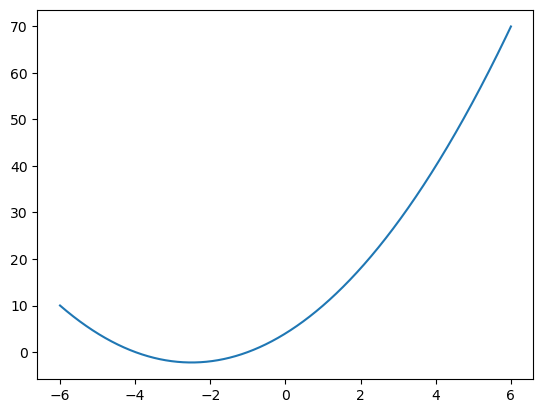

In [7]:
f = lambda x: x**2 + 5*x + 4 
len_dataset = 10000
x = torch.linspace(-6,6,len_dataset)
y = f(x)
data = torch.vstack([x,y]).T
plt.plot(x,y)

In [8]:
data.shape

torch.Size([10000, 2])

In [9]:
indices = torch.randperm(len_dataset)
split_ratio = [0.7,0.3]
training_indices = indices[:int(split_ratio[0]*len_dataset)]
test_indices = indices[int(split_ratio[0]*len_dataset):]
batch_size = 100
#converting training and test sets into dataloaders

training_loader = DataLoader(data[training_indices],batch_size, shuffle= True)
test_loader = DataLoader(data[test_indices],batch_size, shuffle= True)

### Neural Network implementation

In [10]:
class SimpleRegressor(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [11]:
model = SimpleRegressor(num_inputs=1, num_hidden=100, num_outputs=1)
# Push model to device. Has to be only done once
model.to(device)
# Printing a module shows all its submodules
print(model)

SimpleRegressor(
  (linear1): Linear(in_features=1, out_features=100, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)


### Definition of loss and optimizer

In [12]:
# Define a loss function for the training
loss_module = nn.MSELoss()
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [13]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=10000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        total_loss = torch.zeros(1)
        for data in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data[:,0].reshape(-1,1).to(device)

            data_labels = data[:,1].to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()
            total_loss += loss.item()
            ## Step 5: Update the parameters
            optimizer.step()
        
            
        if epoch%100==0:
            print(f'Training loss: {total_loss/len(data_loader)}')

        

In [14]:
train_model(model, optimizer, training_loader, loss_module)


  0%|          | 5/10000 [00:00<07:56, 20.98it/s]

Training loss: tensor([249.3667])


  1%|          | 104/10000 [00:03<06:18, 26.15it/s]

Training loss: tensor([0.4963])


  2%|▏         | 206/10000 [00:07<06:18, 25.86it/s]

Training loss: tensor([0.1839])


  3%|▎         | 305/10000 [00:11<06:07, 26.42it/s]

Training loss: tensor([0.0845])


  4%|▍         | 404/10000 [00:15<06:10, 25.89it/s]

Training loss: tensor([0.0490])


  5%|▌         | 503/10000 [00:19<06:05, 25.97it/s]

Training loss: tensor([0.0350])


  6%|▌         | 605/10000 [00:23<06:00, 26.05it/s]

Training loss: tensor([0.0274])


  7%|▋         | 704/10000 [00:27<06:02, 25.63it/s]

Training loss: tensor([0.0226])


  8%|▊         | 806/10000 [00:31<05:58, 25.66it/s]

Training loss: tensor([0.0193])


  9%|▉         | 905/10000 [00:35<06:22, 23.77it/s]

Training loss: tensor([0.0169])


 10%|█         | 1004/10000 [00:39<05:45, 26.04it/s]

Training loss: tensor([0.0149])


 11%|█         | 1106/10000 [00:43<05:22, 27.59it/s]

Training loss: tensor([0.0133])


 12%|█▏        | 1205/10000 [00:46<05:37, 26.03it/s]

Training loss: tensor([0.0119])


 13%|█▎        | 1304/10000 [00:50<05:14, 27.62it/s]

Training loss: tensor([0.0107])


 14%|█▍        | 1406/10000 [00:54<05:08, 27.84it/s]

Training loss: tensor([0.0097])


 15%|█▌        | 1506/10000 [00:58<05:11, 27.29it/s]

Training loss: tensor([0.0088])


 16%|█▌        | 1605/10000 [01:01<04:58, 28.13it/s]

Training loss: tensor([0.0083])


 17%|█▋        | 1704/10000 [01:05<05:28, 25.28it/s]

Training loss: tensor([0.0076])


 18%|█▊        | 1806/10000 [01:09<05:07, 26.63it/s]

Training loss: tensor([0.0070])


 19%|█▉        | 1905/10000 [01:13<05:06, 26.42it/s]

Training loss: tensor([0.0065])


 20%|██        | 2004/10000 [01:16<05:04, 26.22it/s]

Training loss: tensor([0.0060])


 21%|██        | 2106/10000 [01:20<05:15, 24.98it/s]

Training loss: tensor([0.0057])


 22%|██▏       | 2205/10000 [01:24<05:08, 25.29it/s]

Training loss: tensor([0.0052])


 23%|██▎       | 2304/10000 [01:28<05:03, 25.34it/s]

Training loss: tensor([0.0050])


 24%|██▍       | 2406/10000 [01:32<04:55, 25.66it/s]

Training loss: tensor([0.0047])


 25%|██▌       | 2505/10000 [01:36<04:48, 25.95it/s]

Training loss: tensor([0.0044])


 26%|██▌       | 2604/10000 [01:40<05:10, 23.85it/s]

Training loss: tensor([0.0043])


 27%|██▋       | 2703/10000 [01:44<04:58, 24.44it/s]

Training loss: tensor([0.0040])


 28%|██▊       | 2803/10000 [01:48<05:11, 23.11it/s]

Training loss: tensor([0.0038])


 29%|██▉       | 2904/10000 [01:51<03:51, 30.62it/s]

Training loss: tensor([0.0037])


 30%|███       | 3004/10000 [01:55<03:45, 30.96it/s]

Training loss: tensor([0.0035])


 31%|███       | 3107/10000 [01:58<03:44, 30.77it/s]

Training loss: tensor([0.0034])


 32%|███▏      | 3207/10000 [02:01<03:38, 31.06it/s]

Training loss: tensor([0.0033])


 33%|███▎      | 3307/10000 [02:05<03:40, 30.38it/s]

Training loss: tensor([0.0032])


 34%|███▍      | 3406/10000 [02:08<03:31, 31.14it/s]

Training loss: tensor([0.0031])


 35%|███▌      | 3505/10000 [02:11<03:25, 31.55it/s]

Training loss: tensor([0.0029])


 36%|███▌      | 3605/10000 [02:14<03:26, 31.01it/s]

Training loss: tensor([0.0029])


 37%|███▋      | 3705/10000 [02:17<03:19, 31.55it/s]

Training loss: tensor([0.0028])


 38%|███▊      | 3805/10000 [02:21<03:15, 31.65it/s]

Training loss: tensor([0.0027])


 39%|███▉      | 3905/10000 [02:24<03:12, 31.58it/s]

Training loss: tensor([0.0026])


 40%|████      | 4005/10000 [02:27<03:09, 31.68it/s]

Training loss: tensor([0.0026])


 41%|████      | 4105/10000 [02:30<03:07, 31.39it/s]

Training loss: tensor([0.0025])


 42%|████▏     | 4205/10000 [02:33<03:03, 31.64it/s]

Training loss: tensor([0.0024])


 43%|████▎     | 4305/10000 [02:36<03:00, 31.60it/s]

Training loss: tensor([0.0024])


 44%|████▍     | 4405/10000 [02:40<02:57, 31.57it/s]

Training loss: tensor([0.0023])


 45%|████▌     | 4505/10000 [02:43<02:54, 31.57it/s]

Training loss: tensor([0.0023])


 46%|████▌     | 4605/10000 [02:46<02:54, 30.94it/s]

Training loss: tensor([0.0023])


 47%|████▋     | 4705/10000 [02:49<02:47, 31.66it/s]

Training loss: tensor([0.0022])


 48%|████▊     | 4805/10000 [02:52<02:44, 31.51it/s]

Training loss: tensor([0.0021])


 49%|████▉     | 4905/10000 [02:55<02:42, 31.35it/s]

Training loss: tensor([0.0021])


 50%|█████     | 5005/10000 [02:59<02:37, 31.66it/s]

Training loss: tensor([0.0020])


 51%|█████     | 5105/10000 [03:02<02:34, 31.60it/s]

Training loss: tensor([0.0020])


 52%|█████▏    | 5205/10000 [03:05<02:32, 31.52it/s]

Training loss: tensor([0.0020])


 53%|█████▎    | 5305/10000 [03:08<02:38, 29.71it/s]

Training loss: tensor([0.0020])


 54%|█████▍    | 5407/10000 [03:12<02:27, 31.09it/s]

Training loss: tensor([0.0019])


 55%|█████▌    | 5507/10000 [03:15<02:23, 31.25it/s]

Training loss: tensor([0.0019])


 56%|█████▌    | 5607/10000 [03:18<02:23, 30.71it/s]

Training loss: tensor([0.0019])


 57%|█████▋    | 5707/10000 [03:21<02:16, 31.50it/s]

Training loss: tensor([0.0018])


 58%|█████▊    | 5807/10000 [03:25<02:13, 31.41it/s]

Training loss: tensor([0.0018])


 59%|█████▉    | 5907/10000 [03:28<02:09, 31.59it/s]

Training loss: tensor([0.0018])


 60%|██████    | 6007/10000 [03:31<02:06, 31.59it/s]

Training loss: tensor([0.0018])


 61%|██████    | 6107/10000 [03:34<02:04, 31.35it/s]

Training loss: tensor([0.0017])


 62%|██████▏   | 6206/10000 [03:37<02:01, 31.18it/s]

Training loss: tensor([0.0017])


 63%|██████▎   | 6307/10000 [03:41<01:58, 31.11it/s]

Training loss: tensor([0.0017])


 64%|██████▍   | 6407/10000 [03:44<01:55, 31.07it/s]

Training loss: tensor([0.0017])


 65%|██████▌   | 6507/10000 [03:47<01:52, 30.92it/s]

Training loss: tensor([0.0016])


 66%|██████▌   | 6606/10000 [03:50<01:50, 30.77it/s]

Training loss: tensor([0.0016])


 67%|██████▋   | 6706/10000 [03:54<01:44, 31.41it/s]

Training loss: tensor([0.0016])


 68%|██████▊   | 6806/10000 [03:57<01:41, 31.32it/s]

Training loss: tensor([0.0016])


 69%|██████▉   | 6906/10000 [04:00<01:40, 30.72it/s]

Training loss: tensor([0.0015])


 70%|███████   | 7004/10000 [04:03<01:37, 30.64it/s]

Training loss: tensor([0.0015])


 71%|███████   | 7104/10000 [04:07<01:32, 31.19it/s]

Training loss: tensor([0.0015])


 72%|███████▏  | 7204/10000 [04:10<01:33, 29.89it/s]

Training loss: tensor([0.0015])


 73%|███████▎  | 7304/10000 [04:13<01:29, 30.20it/s]

Training loss: tensor([0.0014])


 74%|███████▍  | 7404/10000 [04:16<01:22, 31.28it/s]

Training loss: tensor([0.0014])


 75%|███████▌  | 7507/10000 [04:20<01:19, 31.19it/s]

Training loss: tensor([0.0014])


 76%|███████▌  | 7607/10000 [04:23<01:15, 31.61it/s]

Training loss: tensor([0.0014])


 77%|███████▋  | 7707/10000 [04:26<01:13, 31.02it/s]

Training loss: tensor([0.0014])


 78%|███████▊  | 7807/10000 [04:29<01:10, 30.97it/s]

Training loss: tensor([0.0013])


 79%|███████▉  | 7907/10000 [04:32<01:06, 31.50it/s]

Training loss: tensor([0.0013])


 80%|████████  | 8007/10000 [04:36<01:03, 31.45it/s]

Training loss: tensor([0.0013])


 81%|████████  | 8106/10000 [04:39<01:03, 29.69it/s]

Training loss: tensor([0.0013])


 82%|████████▏ | 8204/10000 [04:42<00:59, 30.33it/s]

Training loss: tensor([0.0013])


 83%|████████▎ | 8304/10000 [04:46<00:55, 30.79it/s]

Training loss: tensor([0.0013])


 84%|████████▍ | 8404/10000 [04:49<00:52, 30.49it/s]

Training loss: tensor([0.0012])


 85%|████████▌ | 8504/10000 [04:52<00:48, 30.55it/s]

Training loss: tensor([0.0012])


 86%|████████▌ | 8604/10000 [04:55<00:45, 30.73it/s]

Training loss: tensor([0.0012])


 87%|████████▋ | 8707/10000 [04:59<00:41, 31.44it/s]

Training loss: tensor([0.0012])


 88%|████████▊ | 8805/10000 [05:02<00:38, 30.65it/s]

Training loss: tensor([0.0012])


 89%|████████▉ | 8905/10000 [05:05<00:41, 26.22it/s]

Training loss: tensor([0.0012])


 90%|█████████ | 9006/10000 [05:09<00:32, 30.17it/s]

Training loss: tensor([0.0012])


 91%|█████████ | 9105/10000 [05:12<00:31, 28.84it/s]

Training loss: tensor([0.0012])


 92%|█████████▏| 9204/10000 [05:15<00:25, 30.86it/s]

Training loss: tensor([0.0011])


 93%|█████████▎| 9306/10000 [05:19<00:22, 30.75it/s]

Training loss: tensor([0.0011])


 94%|█████████▍| 9405/10000 [05:22<00:19, 31.11it/s]

Training loss: tensor([0.0011])


 95%|█████████▌| 9505/10000 [05:25<00:16, 30.41it/s]

Training loss: tensor([0.0011])


 96%|█████████▌| 9607/10000 [05:28<00:12, 31.59it/s]

Training loss: tensor([0.0011])


 97%|█████████▋| 9707/10000 [05:32<00:09, 31.57it/s]

Training loss: tensor([0.0011])


 98%|█████████▊| 9807/10000 [05:35<00:06, 31.46it/s]

Training loss: tensor([0.0011])


 99%|█████████▉| 9907/10000 [05:38<00:02, 31.34it/s]

Training loss: tensor([0.0010])


100%|██████████| 10000/10000 [05:41<00:00, 29.29it/s]


In [145]:
model.eval()

pred = model(x.reshape(-1,1))

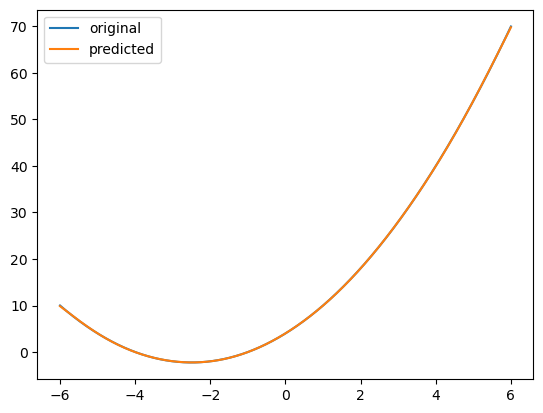

In [146]:
plt.plot(x,y, label='original')
plt.plot(x,pred.detach().numpy(), label='predicted')
plt.legend()